In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
# import country_converter as coco

In [2]:
#df = pd.read_csv(r"C:\Users\simbi\Ironhack\Proyecto\datos_proyecto\attacks.csv", encoding ="unicode_escape")

df = pd.read_csv(r"C:\Users\nuc_humbertore\Ironhack\Proyecto\primer_proyecto_DAPT\datos_proyecto\attacks.csv", encoding ="unicode_escape")

# Limpieza de los datos


## 2.1 limpiar columnas de espacios

In [3]:
# limpiar columnas de espacios

columnas = df.columns
columnas = map(lambda x: x.strip(), columnas)
df.columns = columnas

## 2.2 identificar y eliminar las columnas inservibles

In [4]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
#Después de una exploración del df borramos las columnas
#con datos no numéricos y que no se pueden categorizar 
#P. ej.enlaces y códigos repetidos y columnas basura sin datos

In [6]:
df.drop(['Year', 'Type', 'Area', 'Location',
       'Activity', 'Name', 'Injury', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'], axis= 1, inplace=True)

In [7]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)'], dtype='object')

In [8]:
df.shape

(25723, 6)

## 2.2 filas

## Borramos todas las filas con 100% de Nan

In [9]:
df.dropna(how='all',inplace = True)

In [10]:
# para comprobar cuantos nulos hay por fila y listar los 10 que tienen más

nulos = df.isnull().sum(axis=1)
nulos.sort_values(ascending = False).head(10).index
nul = nulos.sort_values(ascending = False).head(10).index
list(nul)

[25722, 7121, 7128, 7127, 7126, 7125, 7124, 7123, 7122, 7120]

In [11]:
df.shape

(8703, 6)

## borramos los filas con menos de 5 valores que no son Null


In [12]:
#borramos los filas con menos de 10 valores que no son Null

df.dropna(thresh=4, inplace=True)

In [13]:
df.shape

(6222, 6)

In [14]:
df.describe()

,Case Number,Date,Country,Sex,Age,Fatal (Y/N)
count,6221,6222,6178,5735,3471,5760
unique,6205,5362,211,6,157,8
top,1983.06.15,1957,USA,M,17,N
freq,2,11,2214,5092,154,4292


# 3 Dar formato a los datos

## Nornalizar columna "Fatal (Y/N)"

In [15]:
df["Fatal (Y/N)"].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [16]:
#Eliminamos espacios
df["Fatal (Y/N)"] = df["Fatal (Y/N)"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Fatal (Y/N)"]=df["Fatal (Y/N)"].str.lower()

#dejamos los "n" y los "y" y transformamos el resto en "notknown"
df.loc[(df.loc[:, "Fatal (Y/N)"] != "n") & (df.loc[:, "Fatal (Y/N)"] != "y")] = "notknown"

In [17]:
df["Fatal (Y/N)"].unique()

array(['n', 'y', 'notknown'], dtype=object)

## Nornalizar columna "Sex"

In [18]:
df["Sex"].unique()

array(['F', 'M', 'notknown', nan, 'M ', 'lli', 'N', '.'], dtype=object)

In [19]:
#Eliminamos espacios
df["Sex"] = df["Sex"].str.strip(to_strip=None)

#lo pasamos todo a minúsculas
df["Sex"]=df["Sex"].str.lower()

#dejamos las "f" y las "m" y transformamos el resto en "notknown"
df.loc[(df.loc[:, 'Sex'] != "f") & (df.loc[:, 'Sex'] != "m")] = "notknown"

In [20]:
df["Sex"].unique()

array(['f', 'm', 'notknown'], dtype=object)

## Normalizar columna Age a int or float

In [21]:
df["Age"] = df.Age.str.strip()

In [22]:
df["Age_normalize"] = pd.to_numeric(df['Age'], errors='coerce', downcast="integer")

In [23]:
df["Age_normalize"].fillna(value = 0, inplace=True)

In [24]:
df["Age_normalize"] = df["Age_normalize"].astype(int)

array([[<AxesSubplot:title={'center':'Age_normalize'}>]], dtype=object)

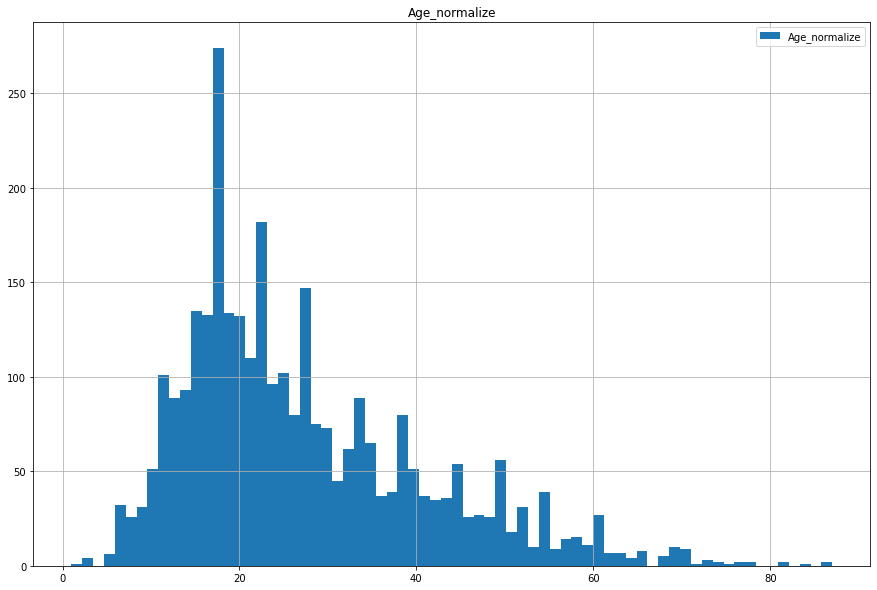

In [26]:
df[df["Age_normalize"] > 0].hist(legend=True,bins=70, figsize = [15,10])

<AxesSubplot:>

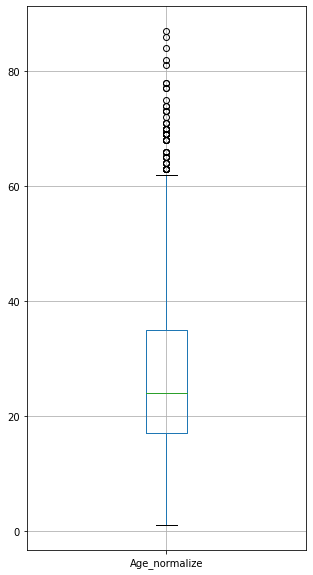

In [132]:
df[df["Age_normalize"] > 0].boxplot(figsize=(5,10))

# Diferencias por sexo
## Edad

In [30]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "f")].describe()

,Age_normalize
count,408.000000
mean,27.098039
std,16.482146
min,3.000000
25%,14.000000
50%,21.000000
75%,38.000000
max,77.000000


In [40]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "m")].describe()

,Age_normalize
count,2704.000000
mean,27.316568
std,13.384286
min,1.000000
25%,17.000000
50%,24.000000
75%,35.000000
max,87.000000


In [41]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "m") & (df["Fatal (Y/N)"] == "y")].describe()

,Age_normalize
count,521.000000
mean,26.783109
std,13.477366
min,1.000000
25%,17.000000
50%,22.000000
75%,33.000000
max,84.000000


In [42]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "m") & (df["Fatal (Y/N)"] == "n")].describe()

,Age_normalize
count,2183.000000
mean,27.443885
std,13.361931
min,3.000000
25%,17.000000
50%,24.000000
75%,35.000000
max,87.000000


In [43]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "f") & (df["Fatal (Y/N)"] == "y")].describe()

,Age_normalize
count,66.000000
mean,30.681818
std,18.911258
min,3.000000
25%,17.250000
50%,24.000000
75%,41.750000
max,77.000000


In [44]:
df[(df["Age_normalize"] > 0) & (df["Sex"] == "f") & (df["Fatal (Y/N)"] == "n")].describe()

,Age_normalize
count,342.000000
mean,26.406433
std,15.909246
min,3.000000
25%,14.000000
50%,20.500000
75%,37.750000
max,70.000000


In [ ]:
mujeres = df["Sex"] == "f"


df_mujeres = df[mujeres]
df_mujeres[df_mujeres["Age_normalize"] > 0].mean()

In [46]:
Mujeres = df[df['Sex'] == "f"]

In [47]:
df.value_counts("Sex")

Sex
m           4655
notknown     992
f            575
dtype: int64

In [48]:
Mujeres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    468
y    107
dtype: int64

In [49]:
Hombres = df[df['Sex'] == "m"]

In [50]:
df.value_counts("Sex")

Sex
m           4655
notknown     992
f            575
dtype: int64

In [51]:
Hombres.value_counts('Fatal (Y/N)')

Fatal (Y/N)
n    3482
y    1173
dtype: int64

Text(0, 0.5, 'Cantidad')

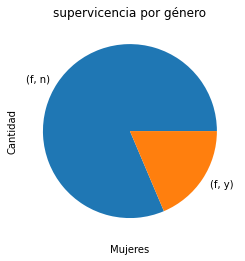

In [53]:
from matplotlib import pyplot as plt
plotdata = Mujeres.value_counts(['Sex','Fatal (Y/N)'])



plotdata.plot(kind="pie")
plt.title("supervicencia por género")
plt.xlabel("Mujeres")
plt.ylabel("Cantidad")

Text(0, 0.5, 'Cantidad')

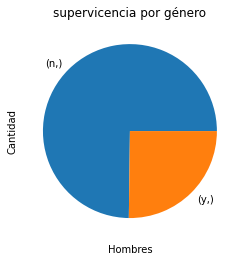

In [55]:
plotdata = Hombres.value_counts(['Fatal (Y/N)'])



plotdata.plot(kind="pie")
plt.title("supervicencia por género")
plt.xlabel("Hombres")
plt.ylabel("Cantidad")

In [60]:
desco = df[df['Sex'] == "notknown"]

In [61]:
desco.value_counts('Fatal (Y/N)')

Fatal (Y/N)
notknown    992
dtype: int64

Text(0, 0.5, 'Cantidad')

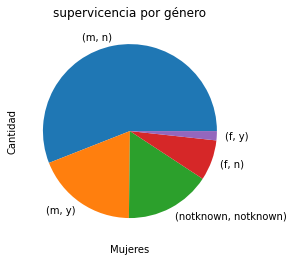

In [56]:
from matplotlib import pyplot as plt
plotdata = df.value_counts(['Sex','Fatal (Y/N)'])



plotdata.plot(kind="pie")
plt.title("supervicencia por género")
plt.xlabel("Mujeres")
plt.ylabel("Cantidad")

In [58]:
Hombres.describe()

,Age_normalize
count,4655.000000
mean,15.867669
std,16.904103
min,0.000000
25%,0.000000
50%,15.000000
75%,26.000000
max,87.000000


In [59]:
Mujeres.describe()

,Age_normalize
count,575.000000
mean,19.227826
std,18.553020
min,0.000000
25%,0.000000
50%,15.000000
75%,30.000000
max,77.000000


## Normalizar columna Date a datetime

In [134]:
"""
Para normalizar las fechas rellenamos los NaN con una fecha futura para 
después poder excluirla facilmente a la hora de trabajr con los datos
de esa columna

Exclude_date= "2030-01-01 00:00:00"

"""

'\nPara normalizar las fechas rellenamos los NaN con una fecha futura para \ndespués poder excluirla facilmente a la hora de trabajr con los datos\nde esa columna\n\nExclude_date= "2030-01-01 00:00:00"\n\n'

In [135]:
df['Date'].isnull().sum()

0

In [136]:
df['Date']

0       25-Jun-2018
1       18-Jun-2018
2       09-Jun-2018
3       08-Jun-2018
4       04-Jun-2018
           ...     
6297    Before 1903
6298    Before 1903
6299      1900-1905
6300      1883-1889
6301      1845-1853
Name: Date, Length: 6222, dtype: object

In [137]:
#convertimos Date a datetime para la columna 'Date_normalize'

df['Date_normalize'] = pd.to_datetime(df['Date'], errors ='coerce')

In [139]:
df['Date_normalize'].isnull().sum()

1648

In [140]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [141]:
# Rellenanos los Nan con una fecha rara para poder filtrar luego. 
# OJO! esto convierte toda la columna en float
Exclude_date = "2030-01-01 00:00:00"
df['Date_normalize'].fillna(value = Exclude_date , inplace=True)

In [143]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6222, dtype: datetime64[ns]

In [144]:
df['Date_normalize'].isnull().sum()

0

In [145]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [162]:
#volvemos a convertir la columna de float a datetime 
df['Date_normalize'] = pd.to_datetime(df['Date_normalize'], errors ='coerce')

In [163]:
df['Date_normalize']

0      2018-06-25
1      2018-06-18
2      2018-06-09
3      2018-06-08
4      2018-06-04
          ...    
6297   2030-01-01
6298   2030-01-01
6299   2030-01-01
6300   2030-01-01
6301   2030-01-01
Name: Date_normalize, Length: 6222, dtype: datetime64[ns]

In [164]:
df['Date_normalize'].isnull().sum()

0

In [165]:
df['Date_normalize'].dtypes

dtype('<M8[ns]')

In [166]:
df['Year_Date'] = df['Date_normalize'].dt.year

In [167]:
df['Year_Date'].isnull().sum()

0

In [168]:
df['Month_Date'] = df['Date_normalize'].dt.month

In [169]:
df['Day_Date'] = df['Date_normalize'].dt.day_name()

In [170]:
df.head(3)

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
0,2018.06.25,25-Jun-2018,USA,f,57,n,57,2018-06-25,2018,6,Monday
1,2018.06.18,18-Jun-2018,USA,f,11,n,11,2018-06-18,2018,6,Monday
2,2018.06.09,09-Jun-2018,USA,m,48,n,48,2018-06-09,2018,6,Saturday


In [171]:
df["Year_Date"].nunique()

209

"""
para estudiar:
la manera en que si hay menos valores que x(en cantidad) en una columna esta pase a ser "undefined"
o algo por el estilo. p ej en "Type" aparee Boatomg que es un error de tiping o Questionable que solo hay 2 valores 
"""

In [172]:

"""


df["Country"] = coco.convert(names=df["Country"], to='name_short')
df["Country"]=df["Country"].str.lower()



"""


'\n\n\ndf["Country"] = coco.convert(names=df["Country"], to=\'name_short\')\ndf["Country"]=df["Country"].str.lower()\n\n\n\n'

In [173]:
"""


df["Country"].nunique()

"""

'\n\n\ndf["Country"].nunique()\n\n'

<AxesSubplot:>

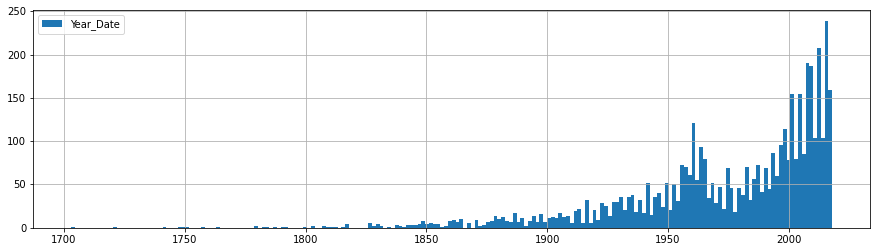

In [174]:
year_filtrado = df[(df.Year_Date < 2028)]
#year_filtrado = df[df["Year_Date"] != Exclude_date]
#Exclude_date



year_filtrado['Year_Date'].hist(legend=True,bins= 200, figsize = [15,4])

In [175]:
type(year_filtrado)

pandas.core.frame.DataFrame

In [176]:
year_filtrado.shape

(4574, 11)

In [177]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Age_normalize'}>,
        <AxesSubplot:title={'center':'Date_normalize'}>],
       [<AxesSubplot:title={'center':'Year_Date'}>,
        <AxesSubplot:title={'center':'Month_Date'}>]], dtype=object)

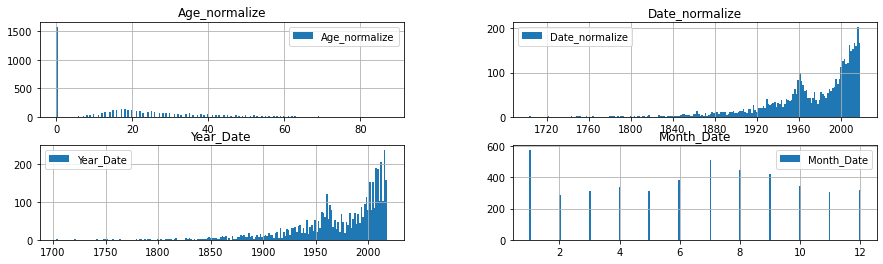

In [178]:
df[df['Year_Date'] != 2030].hist(legend=True,bins= 200, figsize = [15,4])

<AxesSubplot:>

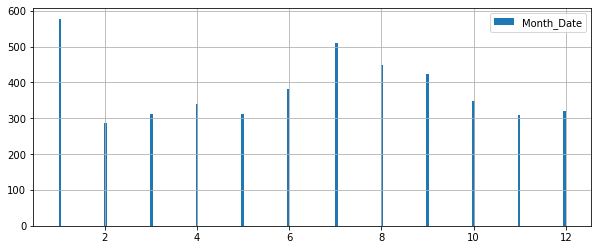

In [179]:
year_filtrado['Month_Date'].hist(legend=True,bins= 200, figsize = [10,4])


<AxesSubplot:>

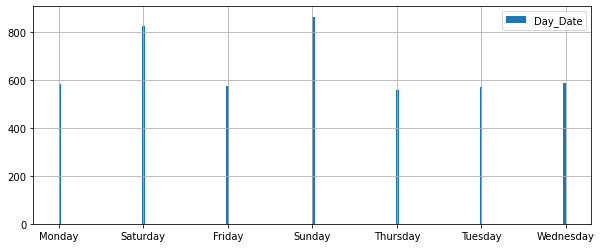

In [180]:
year_filtrado['Day_Date'].hist(legend=True,bins= 200, figsize = [10,4])

In [181]:
df.dtypes

Case Number               object
Date                      object
Country                   object
Sex                       object
Age                       object
Fatal (Y/N)               object
Age_normalize              int32
Date_normalize    datetime64[ns]
Year_Date                  int64
Month_Date                 int64
Day_Date                  object
dtype: object

In [182]:
type(year_filtrado)

# newdf = df[(df.Year_Date != 0)]

pandas.core.frame.DataFrame

<AxesSubplot:>

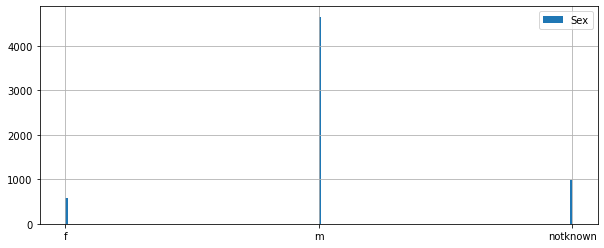

In [184]:
df['Sex'].hist(legend=True,bins= 200, figsize = [10,4])

In [185]:
year_filtrado.sort_values("Year_Date", ascending=True)

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
6160,1703.03.26,26-Mar-1703,BARBADOS,m,19,n,19,1703-03-26,1703,3,Monday
6159,1721.06.00,June 1721,ITALY,m,NaN,y,0,1721-06-01,1721,6,Sunday
6155,1742.12.17,17-Dec-1742,NaN,m,NaN,y,0,1742-12-17,1742,12,Monday
6154,1748.00.00,1748,PANAMA,m,NaN,y,0,1748-01-01,1748,1,Monday
6152,1749.00.00,1749,CUBA,m,14,n,14,1749-01-01,1749,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
30,2018.04.14,14-Apr-2018,BAHAMAS,m,NaN,n,0,2018-04-14,2018,4,Saturday
29,2018.04.15.a,15-Apr-2018,AUSTRALIA,m,37,n,37,2018-04-15,2018,4,Sunday
28,2018.04.15.b,15-Apr-2018,AUSTRALIA,m,41,n,41,2018-04-15,2018,4,Sunday
40,2018.02.23,23-Feb-2018,AUSTRALIA,f,55,n,55,2018-02-23,2018,2,Friday


In [186]:
df.columns

Index(['Case Number', 'Date', 'Country', 'Sex', 'Age', 'Fatal (Y/N)',
       'Age_normalize', 'Date_normalize', 'Year_Date', 'Month_Date',
       'Day_Date'],
      dtype='object')

## Sacar un Df con 2 columnas


In [187]:
year_filtrado[['Year_Date','Age_normalize']].describe()

,Year_Date,Age_normalize
count,4574.000000,4574.000000
mean,1974.055969,17.911893
std,42.055267,17.164462
min,1703.000000,0.000000
25%,1955.000000,0.000000
50%,1988.000000,17.000000
75%,2007.000000,28.000000
max,2018.000000,87.000000


filtrado de columnasplot

In [188]:
#filtrar solo a los hombres
df[df["Sex"] == "m"]

,Case Number,Date,Country,Sex,Age,Fatal (Y/N),Age_normalize,Date_normalize,Year_Date,Month_Date,Day_Date
2,2018.06.09,09-Jun-2018,USA,m,48,n,48,2018-06-09,2018,6,Saturday
3,2018.06.08,08-Jun-2018,AUSTRALIA,m,NaN,n,0,2018-06-08,2018,6,Friday
4,2018.06.04,04-Jun-2018,MEXICO,m,NaN,n,0,2018-06-04,2018,6,Monday
5,2018.06.03.b,03-Jun-2018,AUSTRALIA,m,NaN,n,0,2018-06-03,2018,6,Sunday
6,2018.06.03.a,03-Jun-2018,BRAZIL,m,18,y,18,2018-06-03,2018,6,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
6297,ND.0005,Before 1903,AUSTRALIA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6298,ND.0004,Before 1903,AUSTRALIA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6299,ND.0003,1900-1905,USA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
6300,ND.0002,1883-1889,PANAMA,m,NaN,y,0,2030-01-01,2030,1,Tuesday
